<a href="https://colab.research.google.com/github/s1250103/Public_mori-lab/blob/confirm_label_noize_for_cm_data/eras/confirm_label/create_prototype_model_for_KTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境設定

In [4]:
%tensorflow_version 2.x

In [5]:
# file dealing
import os
import shutil
from google.colab import drive
# data dealing
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
# process deasing
import gc
from time import sleep

# machine learning (back)
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, models, initializers, callbacks
from tensorflow.keras.layers import SimpleRNN

# machine learning
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical


seed = 20201218
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
class video_format:
  name = "video_format"
  # サンプリングされたCMデータの仕様
  playtime = "15秒"
  displaysize = "(any, any, RGB)"
  videoformat = "any"
  # モデルが扱うCMデータ(上のようなデータは、下のように変換される)
  HEIGHT = 45
  WIDTH = 80
  FRAME_SIZE = 30
  COLORinfo = 3 # "RGB"
  FPS = "2 (FRAME_SIZE / playtime)" # 定義ではなく上から導かれた値

# モデル作成

In [15]:
format1 = video_format()
# モデル作成
model = models.Sequential()
# 入力層
model.add(
    layers.Reshape(
        (format1.FRAME_SIZE,
        format1.HEIGHT,
        format1.WIDTH,
        format1.COLORinfo),
        input_shape=(format1.FRAME_SIZE * format1.HEIGHT * format1.WIDTH * format1.COLORinfo,),
        name='Input_Layer' )
)
# 畳み込み0
model.add(
    layers.Conv3D(
        filters=32,
        kernel_size=(3, 3, 3),
        strides=(1, 1, 1),
        padding='same',
        activation='relu',
        name='conv0'))
# pool0
model.add(
    layers.MaxPooling3D(pool_size=(2, 2, 2), name='pool0'))

# 畳み込み1
model.add(
    layers.Conv3D(
        filters=32,
        kernel_size=(3, 3, 3),
        strides=(1, 1, 1),
        padding='same',
        activation='relu',
        name='conv1'))
# pool1
model.add(
    layers.MaxPooling3D(pool_size=(2, 2, 2), name='pool1'))

# dence
model.add(
    layers.Dense(1024,
      activation='relu',
      name='dence0' ),
)
# 出力層
model.add(
    layers.Dense(4, activation='softmax', name='WATERSUPPLY')
)


#モデル表示

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Reshape)        (None, 30, 45, 80, 3)     0         
_________________________________________________________________
conv0 (Conv3D)               (None, 30, 45, 80, 32)    2624      
_________________________________________________________________
pool0 (MaxPooling3D)         (None, 15, 22, 40, 32)    0         
_________________________________________________________________
conv1 (Conv3D)               (None, 15, 22, 40, 32)    27680     
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 7, 11, 20, 32)     0         
_________________________________________________________________
dence0 (Dense)               (None, 7, 11, 20, 1024)   33792     
_________________________________________________________________
WATERSUPPLY (Dense)          (None, 7, 11, 20, 4)     

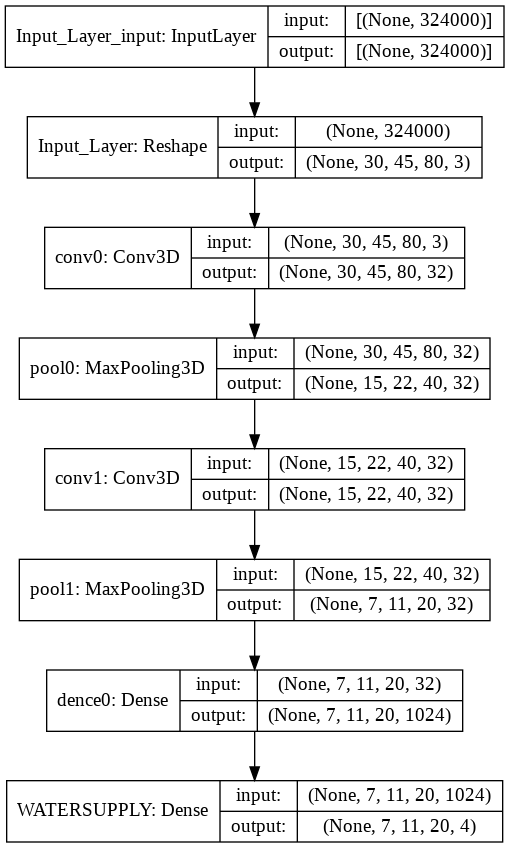

In [16]:
model.summary()
plot_model(model ,show_shapes=True,)